In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 1
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [14]:
from model import Model3 as Net

model = Net()
model.summary(input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
         MaxPool2d-3           [-1, 10, 14, 14]               0
       BatchNorm2d-4           [-1, 10, 14, 14]              20
            Conv2d-5           [-1, 16, 14, 14]           1,440
              ReLU-6           [-1, 16, 14, 14]               0
       BatchNorm2d-7           [-1, 16, 14, 14]              32
            Conv2d-8           [-1, 16, 14, 14]           2,304
              ReLU-9           [-1, 16, 14, 14]               0
        MaxPool2d-10             [-1, 16, 7, 7]               0
      BatchNorm2d-11             [-1, 16, 7, 7]              32
           Conv2d-12             [-1, 16, 7, 7]           2,304
             ReLU-13             [-1, 16, 7, 7]               0
AdaptiveAvgPool2d-14             [-1, 1

In [9]:
from utils import train, test

In [10]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.1883 Batch_id=937 Average Loss=0.1946 Accuracy=94.43: 100%|██████████| 938/938 [00:16<00:00, 55.29it/s]


Test set: Average loss: 0.0948, Accuracy: 9703/10000 (97.03%)

Epoch 2


Train: Batch Loss=0.2450 Batch_id=937 Average Loss=0.0667 Accuracy=97.91: 100%|██████████| 938/938 [00:12<00:00, 75.24it/s]


Test set: Average loss: 0.0558, Accuracy: 9834/10000 (98.34%)

Epoch 3


Train: Batch Loss=0.1572 Batch_id=937 Average Loss=0.0514 Accuracy=98.44: 100%|██████████| 938/938 [00:12<00:00, 72.32it/s]


Test set: Average loss: 0.0453, Accuracy: 9862/10000 (98.62%)

Epoch 4


Train: Batch Loss=0.0109 Batch_id=937 Average Loss=0.0431 Accuracy=98.64: 100%|██████████| 938/938 [00:12<00:00, 76.76it/s]


Test set: Average loss: 0.0408, Accuracy: 9874/10000 (98.74%)

Epoch 5


Train: Batch Loss=0.0727 Batch_id=937 Average Loss=0.0385 Accuracy=98.79: 100%|██████████| 938/938 [00:11<00:00, 78.61it/s]


Test set: Average loss: 0.0487, Accuracy: 9840/10000 (98.40%)

Epoch 6


Train: Batch Loss=0.0697 Batch_id=937 Average Loss=0.0340 Accuracy=98.91: 100%|██████████| 938/938 [00:12<00:00, 77.49it/s]


Test set: Average loss: 0.0397, Accuracy: 9872/10000 (98.72%)

Epoch 7


Train: Batch Loss=0.0196 Batch_id=937 Average Loss=0.0312 Accuracy=99.00: 100%|██████████| 938/938 [00:11<00:00, 78.73it/s]


Test set: Average loss: 0.0363, Accuracy: 9875/10000 (98.75%)

Epoch 8


Train: Batch Loss=0.0107 Batch_id=937 Average Loss=0.0280 Accuracy=99.12: 100%|██████████| 938/938 [00:11<00:00, 78.49it/s]


Test set: Average loss: 0.0381, Accuracy: 9885/10000 (98.85%)

Epoch 9


Train: Batch Loss=0.0006 Batch_id=937 Average Loss=0.0262 Accuracy=99.17: 100%|██████████| 938/938 [00:12<00:00, 73.34it/s]


Test set: Average loss: 0.0363, Accuracy: 9874/10000 (98.74%)

Epoch 10


Train: Batch Loss=0.0047 Batch_id=937 Average Loss=0.0240 Accuracy=99.26: 100%|██████████| 938/938 [00:12<00:00, 72.62it/s]


Test set: Average loss: 0.0376, Accuracy: 9878/10000 (98.78%)

Epoch 11


Train: Batch Loss=0.1388 Batch_id=937 Average Loss=0.0229 Accuracy=99.24: 100%|██████████| 938/938 [00:11<00:00, 78.27it/s]


Test set: Average loss: 0.0312, Accuracy: 9900/10000 (99.00%)

Epoch 12


Train: Batch Loss=0.0085 Batch_id=937 Average Loss=0.0208 Accuracy=99.34: 100%|██████████| 938/938 [00:11<00:00, 78.38it/s]


Test set: Average loss: 0.0382, Accuracy: 9874/10000 (98.74%)

Epoch 13


Train: Batch Loss=0.0022 Batch_id=937 Average Loss=0.0186 Accuracy=99.36: 100%|██████████| 938/938 [00:12<00:00, 74.01it/s]


Test set: Average loss: 0.0335, Accuracy: 9898/10000 (98.98%)

Epoch 14


Train: Batch Loss=0.0003 Batch_id=937 Average Loss=0.0182 Accuracy=99.43: 100%|██████████| 938/938 [00:12<00:00, 74.63it/s]


Test set: Average loss: 0.0348, Accuracy: 9894/10000 (98.94%)

Epoch 15


Train: Batch Loss=0.0131 Batch_id=937 Average Loss=0.0180 Accuracy=99.40: 100%|██████████| 938/938 [00:12<00:00, 74.64it/s]


Test set: Average loss: 0.0374, Accuracy: 9884/10000 (98.84%)



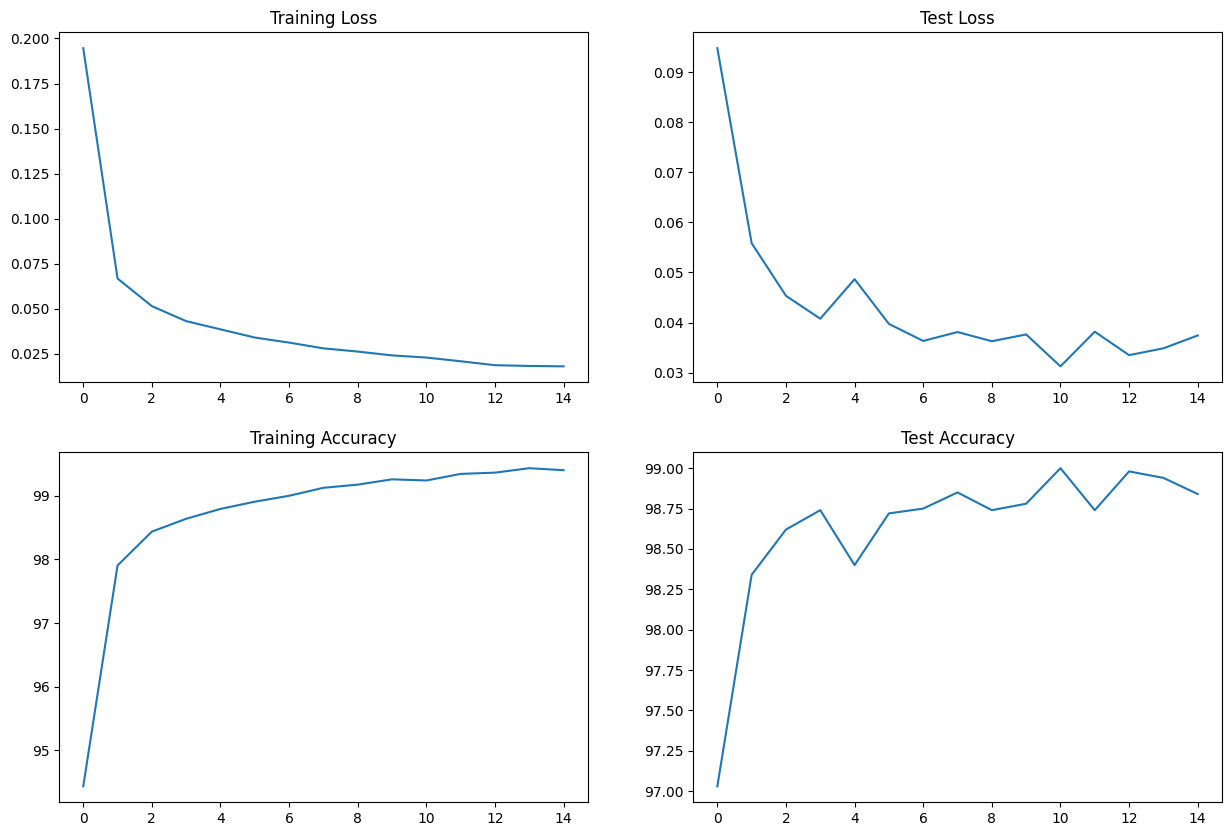

In [11]:
from utils import plot_stats
plot_stats()

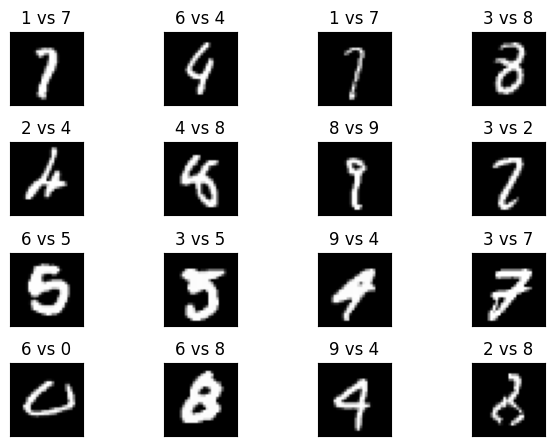

In [12]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual